<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/projeto_final/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação

Olá! Este é o notebook de apresentação do desafio final do módulo 1 do **curso de Data Science aplicada da Alura**. Este é um projeto que faz parte de um [repositório no github](https://github.com/matheus97eng/Bootcamp_Alura_2021), caso se interesse pelo trabalho e queira navegar mais nestes dados! Neste notebook você vai encontrar uma análise exploratória utilizando algumas bibliotecas python sobre dados disponibilizados pelo **dataSUS** em relação a procedimentos hospitalares (mais específicamente internações). 

Aqui será realizado mais especificamente informações sobre o estado de **Goiás**, onde eu moro. Vamos focar nos números comparando os anos de 2020 e 2021 com anos anteriores para verificarmos impactos da **pandemia** que abalou e ainda abalará o mundo inteiro.

## Sobre os dados

Os dados foram todos extraídos do [site do TABNET organizado pelo dataSUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/). Mais especificamente, foram extraídas informações da área de **Assistência à Saúde** em 4 tabelas distintas:

+ Número de internados
  > É o número de autorizações de internação hospitalar (AIH) aprovadas. É importante dizer que esse **não significa** necessariamente o número de pessoas internadas, pois os dados também contabilizam tranferências de unidades hospitalares e reinternações. 
+ Número de óbitos
  > Número de internações que tiveram como laudo o óbito
+ Taxa de mortalidade
  > É o número de óbitos dividido pelo total de internações, em porcentagem. 
+ Valor total de gastos
  > Contabiliza gastos em serviços profissionais e serviços profissionais, tanto da parte federal quanto da gestão hospitalar. Segundo [a documentação do TABNET](http://tabnet.datasus.gov.br/cgi/sih//Proced_hosp_loc_int_2008.pdf), *este valor não obrigatoriamente corresponde ao valor repassado ao estabelecimento, pois, dependendo da situação das unidades, estes recebem recursos orçamentários ou pode haver retenções e pagamentos de incentivos, não aqui apresentados. Portanto, este valor deve ser considerado como o valor aprovado da produção.* 

O processamento desses dados começou em **2008**. Os valores nas tabelas estão dispostos **mensalmente** e, segundo o próprio TABNET, os dados dos **últimos 6 meses** ainda podem sofrer alterações. *Se você estiver lendo este notebook depois de Novembro de 2021, fica o convite para você tentar fazer o download das mesmas tabelas pelo site e comparar se os dados se mantém!*

O download das tabelas foi feito no dia **26/05/2021** e colocado [neste repositório do github](https://github.com/matheus97eng/Bootcamp_Alura_2021/tree/main/modulo-1/projeto_final/dados).

## Objetivos

Neste notebook se analisa os dados das internações hospitalares do SUS, comparando Goiás com outros estados em relação a impactos causados pela pandemia. O **como** faremos isso se resume em alguns pontos:

+ analisar como o número de internações, número de óbitos e gastos por internação se comporta ao longo do tempo, principalmente nos anos de 2020 e 2021

+ comparar esses valores entre os estados da região Centro-Oeste (onde se localiza o estado de Goiás) e outros estados de interesse por características específicas, por exemplo: São Paulo por ser o estado de maior população.

Sem mais, vamos à analise com python!

# Importando bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Extraindo dados do repositório

## Dados referente aos gastos com as AIH

In [ ]:
# importando tabelas do repositório de dados
url_gastos = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/projeto_final/dados/gastos_totais.csv?raw=true'
df_gastos = pd.read_csv(url_gastos, encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
df_gastos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região/Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1283.84,-,...,69852825.90,62859787.25,70453476.50,70977643.84,74367196.35,70580522.95,72841735.60,75410695.12,71791262.67,77822894.11,70003796.02,68623448.48,72421205.47,67715770.80,72901945.25,71953402.86,72079637.35,68310792.30,78271579.42,77340361.36,76284578.47,78831983.13,75478807.49,74438232.99,77296455.74,73920234.17,72043271.34,66069508.63,87925506.34,88242577.03,87996515.06,85026192.77,77683340.37,76498384.66,76398561.75,77816578.09,75817801.87,50330800.76,30038164.35,9.727782e+09
1,.. Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
2,.. Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
3,.. Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
4,.. Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08


## Dados referente à quantidade de internações

In [ ]:
# importando a tabela do repositório de dados
url_internados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/projeto_final/dados/internacoes.csv?raw=true'
df_internados = pd.read_csv(url_internados, encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
df_internados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região/Unidade da Federação,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,12,10,-,1,2,7,31,572,1254,4509,14973,45724,79335,75434,80410,82122,83323,81990,80693,81766,80745,78874,74936,72534,79840,74773,89290,84659,84706,82153,82996,85262,82754,83741,83275,79451,84040,79261,91681,...,82348,75118,84514,86093,87762,82756,83045,86364,82898,87416,80518,78308,83195,78261,85675,85157,86916,80691,85361,86037,86117,88780,85187,81972,85894,81267,78625,62049,66211,68551,75217,76332,74475,75745,71856,70742,67387,47889,28833,12874018
1,.. Rondônia,-,1,-,-,-,-,-,7,42,105,393,1828,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,...,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
2,.. Acre,1,-,-,-,-,1,-,5,17,100,573,1490,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,...,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069
3,.. Amazonas,3,2,-,1,-,-,1,59,69,565,2780,9979,13628,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,...,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754
4,.. Roraima,-,-,-,-,-,1,-,14,8,73,818,1121,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,...,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989


## Dados referente aos óbitos

In [ ]:
# importando a tabela do repositório de dados
url_obitos = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/projeto_final/dados/obitos.csv?raw=true'
df_obitos = pd.read_csv(url_obitos, encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
df_obitos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região/Unidade da Federação,1998/Ago,1998/Set,1999/Set,1999/Out,2000/Jan,2001/Dez,2002/Out,2004/Jul,2005/Nov,2007/Jan,2007/Fev,2007/Mar,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,-,-,-,-,-,-,-,-,1,-,-,-,1,1,11,30,136,404,994,1366,1347,1413,1401,1435,1388,1343,1277,1273,1365,1233,1353,1437,1273,1490,1617,1533,1586,1481,...,2244,1983,2207,2412,2486,2315,2228,2403,2150,2405,2159,2251,2348,2177,2400,2386,2400,2145,2427,2386,2327,2312,2345,2423,2453,2292,2500,3726,5171,3786,3343,2909,2528,2412,2468,3021,4580,2478,1516,319412
1,.. Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,7,26,27,67,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,...,334,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335,283,326,402,420,275,270,37058
2,.. Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,14,34,64,107,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,...,132,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131,122,147,172,134,121,66,18615
3,.. Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,35,105,214,260,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,...,452,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693,691,759,999,2456,825,329,64963
4,.. Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,6,14,27,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,...,117,83,84,102,100,137,118,120,122,121,105,92,117,107,93,97,135,114,152,136,124,108,124,112,126,92,112,90,241,306,159,98,99,101,133,139,265,295,160,12466


## Dados referente à taxa de mortalidade

In [ ]:
# importando a tabela do repositório de dados
url_mortalidade = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/projeto_final/dados/taxa_mortalidade.csv?raw=true'
df_mortalidade = pd.read_csv(url_mortalidade, encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
df_mortalidade.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região/Unidade da Federação,2007/Jan,2007/Fev,2007/Mar,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,8.33,-,NaN,-,14.29,3.23,1.92,2.39,3.02,2.70,2.17,1.72,1.79,1.76,1.71,1.72,1.69,1.66,1.56,1.58,1.73,1.65,1.87,1.80,1.70,1.67,1.91,1.81,1.93,1.78,1.81,1.94,1.89,1.76,1.90,1.88,1.85,1.85,1.88,...,2.73,2.64,2.61,2.80,2.83,2.80,2.68,2.78,2.59,2.75,2.68,2.87,2.82,2.78,2.80,2.80,2.76,2.66,2.84,2.77,2.70,2.60,2.75,2.96,2.86,2.82,3.18,6.00,7.81,5.52,4.44,3.81,3.39,3.18,3.43,4.27,6.80,5.17,5.26,2.48
1,.. Rondônia,NaN,-,NaN,NaN,NaN,NaN,-,7.14,6.67,6.62,1.48,1.28,1.17,2.02,1.86,1.79,1.74,1.13,0.97,1.12,1.26,1.18,1.52,1.74,1.40,1.51,1.50,1.45,1.34,1.29,1.43,1.73,1.47,1.45,1.27,1.40,1.57,1.90,1.85,...,3.42,2.97,2.85,3.00,2.59,2.64,2.89,3.05,2.49,2.66,3.13,3.11,3.21,2.62,2.66,3.25,2.83,2.68,3.07,2.68,2.65,2.48,2.46,2.61,3.18,2.71,3.15,3.88,5.07,5.81,4.61,4.78,4.00,3.22,3.68,4.81,5.82,5.75,12.82,2.67
2,.. Acre,-,NaN,NaN,NaN,-,NaN,-,17.65,14.00,5.93,4.30,2.86,3.09,2.64,2.44,2.30,2.14,2.25,0.99,1.72,2.13,1.96,2.86,2.69,1.75,2.19,1.94,1.87,1.75,2.22,2.58,4.87,2.15,2.48,1.91,2.33,2.57,2.66,2.28,...,3.33,2.75,2.98,3.12,3.19,4.03,3.91,3.75,3.57,3.44,2.98,3.54,3.59,3.80,3.62,3.87,3.27,3.06,2.93,3.69,3.17,3.48,3.84,3.95,3.75,4.11,3.45,5.55,6.74,6.77,5.64,4.20,3.52,3.07,3.83,4.50,3.73,4.18,3.69,2.92
3,.. Amazonas,-,-,NaN,NaN,NaN,-,-,-,6.19,3.78,2.14,1.91,2.21,1.83,2.06,2.04,1.96,1.64,1.62,1.54,1.87,1.68,1.63,1.72,2.02,1.95,2.27,2.21,2.42,2.13,2.04,2.09,2.22,1.73,1.82,1.76,1.83,1.92,2.28,...,2.94,2.93,3.04,3.27,3.35,3.33,3.07,3.11,3.11,3.48,3.06,3.22,3.15,3.61,3.52,3.03,2.86,3.16,3.13,3.32,3.29,3.20,3.23,3.42,3.64,3.45,3.95,12.41,10.06,5.38,4.67,4.35,4.41,4.37,4.92,6.16,15.03,7.66,5.26,2.89
4,.. Roraima,NaN,NaN,NaN,NaN,-,NaN,-,-,1.37,0.73,1.25,1.42,1.04,1.37,1.22,1.08,1.53,1.80,1.70,1.94,1.59,1.56,2.22,1.71,1.63,1.03,2.30,2.15,1.77,1.59,2.22,2.50,2.39,2.33,2.01,2.18,2.28,2.37,1.93,...,3.19,2.56,2.42,2.99,2.68,3.59,3.00,2.96,3.20,3.20,3.22,2.80,3.33,3.21,2.69,2.67,3.72,3.25,3.88,3.33,3.13,2.57,3.16,3.15,3.38,2.56,3.24,3.48,8.36,10.29,5.16,2.94,3.00,2.97,4.09,4.14,7.90,10.33,7.43,2.68


# Tratando os dataframes

Em algumas linhas de código, modificamos os dataframes para facilitar a manipulação dos mesmos:

+ tornar a coluna de Unidade da Federação (UF) o índice
+ separar uma coluna com somente a informação da região onde se localiza a UF e retirar as linhas com os valores totais das regiões
+ retirar os meses anteriores ao ano de 2008

## Tornando as regiões como índices

In [ ]:
df_gastos.set_index('Região/Unidade da Federação', inplace=True)
df_gastos.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1283.84,-,-,...,69852825.90,62859787.25,70453476.50,70977643.84,74367196.35,70580522.95,72841735.60,75410695.12,71791262.67,77822894.11,70003796.02,68623448.48,72421205.47,67715770.80,72901945.25,71953402.86,72079637.35,68310792.30,78271579.42,77340361.36,76284578.47,78831983.13,75478807.49,74438232.99,77296455.74,73920234.17,72043271.34,66069508.63,87925506.34,88242577.03,87996515.06,85026192.77,77683340.37,76498384.66,76398561.75,77816578.09,75817801.87,50330800.76,30038164.35,9.727782e+09
.. Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
.. Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
.. Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
.. Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08


## Criando uma nova coluna para Regiões

In [ ]:
# separando regiões de estados

region = []   # lista com as regiões
uf = []       # lista com as Unidades da Federação
for place in df_gastos.index:
  if 'Região' in place:
    region.append(place)
  else:
    uf.append(place[3:])

df_gastos.drop(region, inplace=True)
df_gastos.index = uf
df_gastos.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [ ]:
# formando a coluna onde separamos as UF por região

regions_column = 7*[region[0]] + 9*[region[1]] + 4*[region[2]] + 3*[region[3]] + 4*[region[4]]
df_gastos['Região'] = regions_column
df_gastos.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08,Região Norte
Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08,Região Norte
Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09,Região Norte
Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08,Região Norte
Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09,Região Norte


## Eliminando dados de meses anteriores a 2008

Todos os dados do TABNET começaram a ser processados em 2008. Mesmo assim, vemos nas tabelas acima dados de anos anteriores. Isso significa que são valores **processados em 2008**, mas não representam a **totalidade** dos valores destes períodos. Vamos nos interessar inicialmente com os os números a partir de Janeiro de 2008, que é quando o processamento começou a ser feito.

In [ ]:
i = 0
delete = []
while (df_gastos.columns[i] != '2008/Jan'):
  delete.append(df_gastos.columns[i])
  i+=1

df_gastos.drop(delete, axis=1, inplace=True)
df_gastos.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Rondônia,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08,Região Norte
Acre,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08,Região Norte
Amazonas,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09,Região Norte
Roraima,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,...,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,252

## Plotando um primeiro gráfico

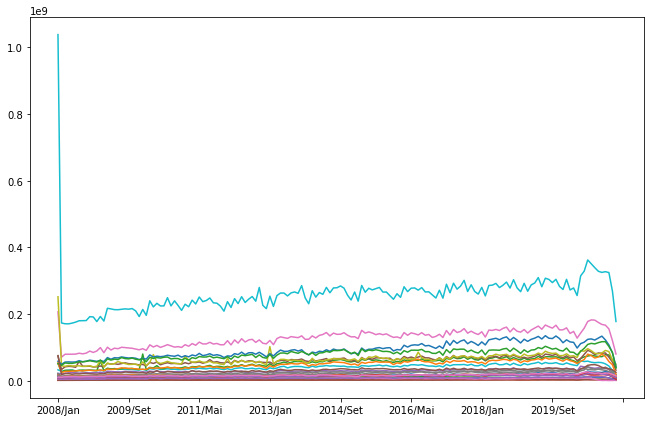

In [ ]:
df_gastos.T.loc['2008/Jan':'2021/Mar'].plot(figsize=(11,7), legend=None)

Sem nem fazer alguns processamentos no gráfico, percebemos uma inconsistência nos dados. Os dados no começo de 2008 estão muito elevados, pelo menos quando olhamos para os custos do SUS. Podemos supor que esses altos valores não representam a realidade como eles nos contam, pois eles podem estar carregando informações que na verdade são de datas anteriores. 

Por não querer que esses dados estraguem a análise exploratória, **será retirado também os valores do mês de Janeiro de 2008 em todos os dataframes**.

In [ ]:
df_gastos.drop('2008/Jan', axis=1, inplace=True)
df_gastos.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08,Região Norte
Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08,Região Norte
Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09,Região Norte
Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,...,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,25

## tratando os outros dataframes

Agora, resta os outros dataframes que estão sendo trabalhados. Será realizado o mesmo procedimento feito com o dataframe de gastos do SUS.

In [ ]:
def processing(df):

  # 1 - Tornando as regiões como índices
  df.set_index('Região/Unidade da Federação', inplace=True)

  # 2 - Criando uma nova coluna para Regiões
  region = []   # lista das regiões
  uf = []       # lista das Unidades da Federação
  for place in df.index:
    if 'Região' in place:
      region.append(place)
    else:
      uf.append(place[3:])
  df.drop(region, inplace=True)
  df.index = uf
  regions_column = 7*[region[0]] + 9*[region[1]] + 4*[region[2]] + 3*[region[3]] + 4*[region[4]]
  df['Região'] = regions_column

  # 3 - Deletando colunas dos meses antes de Fevereiro de 2008:
  i = 0
  delete = []
  while (df.columns[i] != '2008/Fev'):
    delete.append(df.columns[i])
    i+=1
  df.drop(delete, axis=1, inplace=True)

In [ ]:
# internados:
processing(df_internados)
df_internados.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Rondônia,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8019,8521,8352,8359,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,...,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9837,9506,8710,7156,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140,Região Norte
Acre,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4053,3782,4519,4274,4597,3933,3787,3027,1971,4232,4158,4026,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4344,4859,...,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3840,3792,3648,2829,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069,Região Norte
Amazonas,13828,14869,14323,14904,14578,14936,14413,13346,12602,12137,12050,12585,12170,13891,12228,12526,13409,13492,13728,13201,12614,12707,12549,13542,12401,14616,13674,13545,13197,13188,13595,13485,14067,13212,13308,13978,13488,15187,14388,13665,...,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15343,12285,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754,Região Norte
Roraima,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2558,2473,2447,2236,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,...,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989,Região Norte
Pará,40225,43274,44734,44894,43375,42102,42623,43120,41511,39500,38044,42604,39241,46754,45663,44842,43580,44144,45996,45576,44457,44155,41346,43745,42286,48037,44248,46360,43746,41934,45673,44367,42910,43087,42265,44268,42044,46579,42490,43492,...,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718,6479075,Região Norte


In [ ]:
# mortalidade
processing(df_mortalidade)
df_mortalidade.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Rondônia,1.17,2.02,1.86,1.79,1.74,1.13,0.97,1.12,1.26,1.18,1.52,1.74,1.40,1.51,1.50,1.45,1.34,1.29,1.43,1.73,1.47,1.45,1.27,1.40,1.57,1.90,1.85,2.11,2.29,2.30,2.22,2.32,2.25,2.25,2.35,2.16,1.91,2.12,2.47,2.30,...,2.97,2.85,3.00,2.59,2.64,2.89,3.05,2.49,2.66,3.13,3.11,3.21,2.62,2.66,3.25,2.83,2.68,3.07,2.68,2.65,2.48,2.46,2.61,3.18,2.71,3.15,3.88,5.07,5.81,4.61,4.78,4.00,3.22,3.68,4.81,5.82,5.75,12.82,2.67,Região Norte
Acre,3.09,2.64,2.44,2.30,2.14,2.25,0.99,1.72,2.13,1.96,2.86,2.69,1.75,2.19,1.94,1.87,1.75,2.22,2.58,4.87,2.15,2.48,1.91,2.33,2.57,2.66,2.28,2.47,3.41,3.08,3.07,2.98,2.84,2.30,2.84,2.99,3.25,2.82,2.88,2.74,...,2.75,2.98,3.12,3.19,4.03,3.91,3.75,3.57,3.44,2.98,3.54,3.59,3.80,3.62,3.87,3.27,3.06,2.93,3.69,3.17,3.48,3.84,3.95,3.75,4.11,3.45,5.55,6.74,6.77,5.64,4.20,3.52,3.07,3.83,4.50,3.73,4.18,3.69,2.92,Região Norte
Amazonas,2.21,1.83,2.06,2.04,1.96,1.64,1.62,1.54,1.87,1.68,1.63,1.72,2.02,1.95,2.27,2.21,2.42,2.13,2.04,2.09,2.22,1.73,1.82,1.76,1.83,1.92,2.28,2.00,2.06,2.12,2.02,2.07,1.93,2.29,2.59,2.26,2.42,2.21,2.39,2.11,...,2.93,3.04,3.27,3.35,3.33,3.07,3.11,3.11,3.48,3.06,3.22,3.15,3.61,3.52,3.03,2.86,3.16,3.13,3.32,3.29,3.20,3.23,3.42,3.64,3.45,3.95,12.41,10.06,5.38,4.67,4.35,4.41,4.37,4.92,6.16,15.03,7.66,5.26,2.89,Região Norte
Roraima,1.04,1.37,1.22,1.08,1.53,1.80,1.70,1.94,1.59,1.56,2.22,1.71,1.63,1.03,2.30,2.15,1.77,1.59,2.22,2.50,2.39,2.33,2.01,2.18,2.28,2.37,1.93,1.94,1.92,2.27,2.00,2.43,3.24,2.57,2.23,2.60,2.62,3.13,2.93,1.76,...,2.56,2.42,2.99,2.68,3.59,3.00,2.96,3.20,3.20,3.22,2.80,3.33,3.21,2.69,2.67,3.72,3.25,3.88,3.33,3.13,2.57,3.16,3.15,3.38,2.56,3.24,3.48,8.36,10.29,5.16,2.94,3.00,2.97,4.09,4.14,7.90,10.33,7.43,2.68,Região Norte
Pará,1.45,1.48,1.39,1.41,1.49,1.49,1.52,1.43,1.52,1.51,1.71,1.68,1.46,1.51,1.75,1.60,1.73,1.55,1.59,1.63,1.67,1.58,1.89,1.75,1.58,1.58,1.61,1.66,1.77,1.83,1.84,1.67,1.84,1.68,1.88,1.94,1.82,1.76,1.66,1.81,...,2.41,2.30,2.46,2.55,2.41,2.17,2.40,2.20,2.27,2.21,2.51,2.38,2.33,2.42,2.33,2.42,2.25,2.41,2.39,2.27,2.18,2.35,2.62,2.28,2.38,2.80,4.61,7.77,4.99,3.87,3.22,2.87,2.82,2.63,3.16,3.54,3.65,3.70,2.15,Região Norte


In [ ]:
# óbitos
processing(df_obitos)
df_obitos.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Rondônia,65,103,96,92,106,80,71,77,87,79,89,123,97,138,126,122,99,102,117,139,125,121,106,121,125,172,158,182,180,192,191,195,184,187,186,169,149,184,218,190,...,272,299,310,283,265,291,315,245,276,316,297,303,251,281,350,319,268,305,266,269,257,255,257,313,258,274,278,377,444,386,423,335,283,326,402,420,275,270,37058,Região Norte
Acre,115,110,103,103,96,92,38,72,88,77,116,109,66,99,83,86,69,84,78,96,91,103,77,94,93,121,103,106,135,122,126,124,125,95,115,138,134,129,125,133,...,97,118,125,126,155,155,152,135,136,93,107,126,120,118,139,133,122,118,143,126,143,140,142,144,156,126,157,190,205,200,150,131,122,147,172,134,121,66,18615,Região Norte
Amazonas,306,272,295,304,286,245,233,205,236,204,196,216,246,271,278,277,325,287,280,276,280,220,229,239,227,280,312,271,272,279,275,279,271,303,345,316,326,335,344,288,...,401,473,522,546,512,499,502,478,560,464,474,506,538,597,495,477,507,527,570,538,544,519,529,604,534,606,1525,1335,750,720,684,693,691,759,999,2456,825,329,64963,Região Norte
Roraima,18,28,27,26,35,40,39,41,35,33,44,38,35,26,52,51,42,42,58,64,59,57,45,56,52,67,50,58,58,70,62,68,86,65,53,66,52,65,64,46,...,83,84,102,100,137,118,120,122,121,105,92,117,107,93,97,135,114,152,136,124,108,124,112,126,92,112,90,241,306,159,98,99,101,133,139,265,295,160,12466,Região Norte
Pará,583,641,624,635,648,627,650,617,630,597,650,714,571,707,801,719,755,683,731,744,744,698,781,767,670,759,711,770,774,769,839,743,791,725,796,860,767,819,707,787,...,911,970,1059,1102,990,879,1023,901,991,872,960,984,886,999,934,987,833,981,973,932,924,950,1022,946,921,1060,1336,2449,1614,1393,1193,1052,1082,978,1127,1185,885,545,139591,Região Norte


# Análise Exploratória

Agora será analisado os dados de todos os dataframes ao longo do tempo. As regiões analisadas serão a Centro-Oeste, por ser onde se encontra Goiás, e a região Sudeste, onde está São Paulo, o estado com o maior número de habitantes.

## Internações



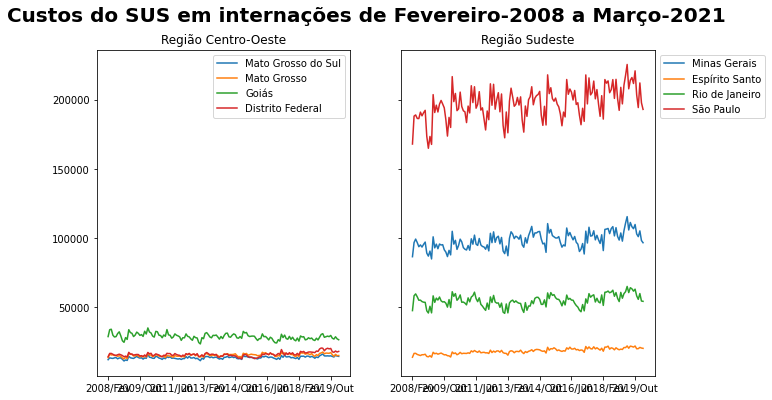

In [ ]:
fig, axs = plt.subplots(1, 2, sharex = False, sharey = True)

axs[0] = df_internados.query('Região == "Região Centro-Oeste"').T.loc[:'2020/Mar'].plot(figsize=(10,6), ax=axs[0])
axs[0].set_title('Região Centro-Oeste')

axs[1] = df_internados.query('Região == "Região Sudeste"').T.loc[:'2020/Mar'].plot(figsize=(10,6), ax=axs[1])
axs[1].set_title('Região Sudeste')

plt.suptitle('Custos do SUS em internações de Fevereiro-2008 a Março-2021', size=20, weight='bold')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

Agora, só um gráfico da região Centro-Oeste para melhor visualização:

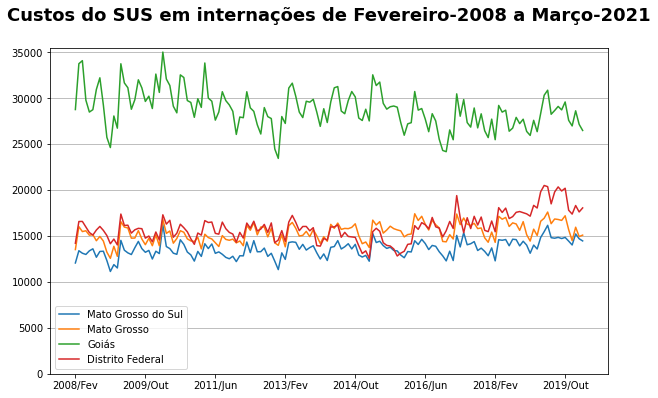

In [ ]:
df_internados.query('Região == "Região Centro-Oeste"').T.loc[:'2020/Mar'].plot(figsize=(10,6))

plt.ylim(0,35500)
plt.grid(axis='y')
plt.title('Custos do SUS em internações de Fevereiro-2008 a Março-2021\n', size=18, weight='bold')
plt.show()

Pontos a se destacar:

+ Os custos no estado de Goiás nos mostram um certo decrescimento ao longo do tempo, apesar das oscilações. Esse descrescimento não é observado em nenhum outro dos estados aqui analisados. Pelo contrário, estados como São Paulo e Minas Gerais mostraram um crescimento nos gastos ao longo dos anos. Distrito Federal aumentou os custos também nos últimos anos.

+ a grande quantidade de internados nos estados de São Paulo, Minas Gerais e Rio de Janeiro que se deve principalmente ao grande número de habitantes nesses lugares. Com informações do [IBGE](https://cidades.ibge.gov.br/) podemos mostrar estimativas das populações das UF em 2020. Vamos juntar as informações aqui das 2 regiões analisadas:

> 1º São Paulo - 46.289.333 habitantes

> 2º Minas Gerais - 21.292.666 habitantes

> 3º Rio de Janeiro - 17.366.189 habitantes

> 4º Goiás - 7.113.540 habitantes

> 5º Espírito Santo - 4.064.052 habitantes

> 6º Mato Grosso - 3.526.220 habitantes

> 7º Distrito Federal - 3.055.149 habitantes

> 8º Mato Grosso do Sul - 2.809.394 habitantes

## Óbitos

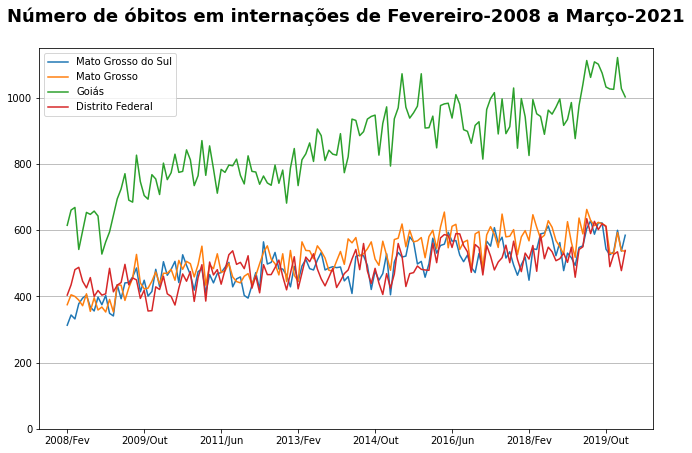

In [ ]:
df_obitos.query('Região == "Região Centro-Oeste"').T.loc[:'2020/Mar'].plot(figsize=(11,7))

plt.ylim(0,1150)
plt.grid(axis='y')
plt.title('Número de óbitos em internações de Fevereiro-2008 a Março-2021\n', size=18, weight='bold')
plt.show()

Observações:

+ Infelizmente, podemos ver um grande aumento de óbitos em internações no estado de Goiás. Esse aumento pode ser observado também nas outras UF da região
+ A última observação significa que a taxa de mortalidade pode estar aumentando, já que não vemos uma tendência de decrescimento no número de internações
+ É bem difícil de se analisar o que está acontecendo com Distrito Federal, Mato Grosso e Mato Grosso do Sul quanto a óbitos, além do crescimento ao longo do tempo. Não é possível observar nenhuma tendência relacionando as linhas dos gráficos.

## Taxa de mortalidade

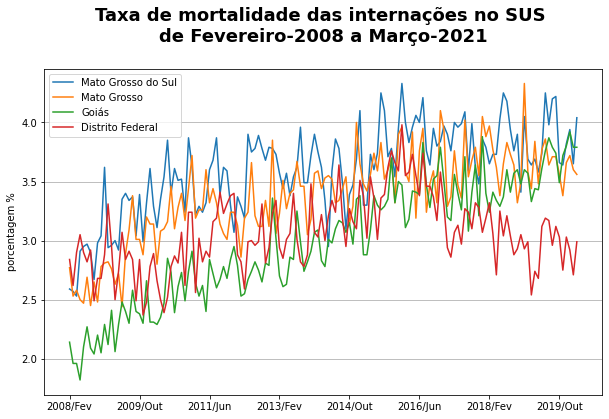

In [ ]:
df_mortalidade.query('Região == "Região Centro-Oeste"').T.loc[:'2020/Mar'].plot(figsize=(10,6))

plt.grid(axis='y')
plt.ylabel('porcentagem %')
plt.title('Taxa de mortalidade das internações no SUS \nde Fevereiro-2008 a Março-2021\n', size=18, weight='bold')
plt.show()

É muito difícil perceber algo por meio desse gráfico, mas podemos ver o aumento na taxa de mortalidade, como foi obervado anteriormente. Podemos ver também que a taxa de mortalidade na região Centro-Oeste variou de um pouco menos de 2% a um pouco mais de 4%.

Com intuito de limpar o gráfico para visualizações, será comparado agora Goiás com Amazonas, um dos estados que mais sofreu com os impactos da pandemia, principalmente com relação à falta de respiradouros.

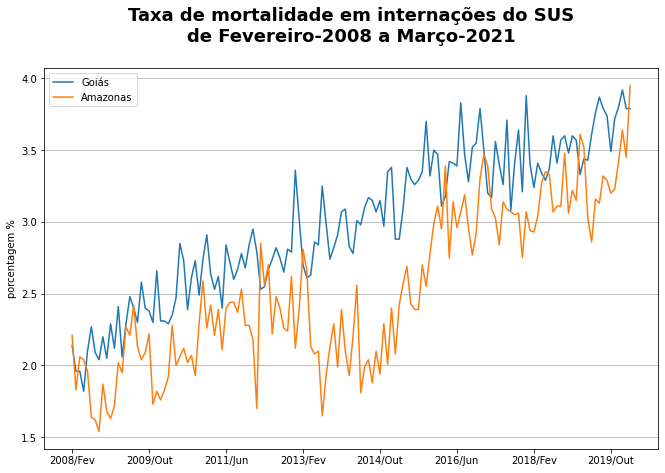

In [ ]:
df_mortalidade.T.loc[:'2020/Mar'][['Goiás', 'Amazonas']].plot(figsize=(11,7))

plt.grid(axis='y')
plt.ylabel('porcentagem %')
plt.title('Taxa de mortalidade em internações do SUS\nde Fevereiro-2008 a Março-2021\n', size=18, weight='bold')
plt.show()

Podemos observar um aumento muito acentuado no Amazonas no final do gráfico, mas a taxa de mortalidade nesse final do período é bem próxima comparada com Goiás.

## Gastos

Valor referente às AIH aprovadas no período. Este valor não obrigatoriamente
corresponde ao valor repassado ao estabelecimento, pois, dependendo da situação das unidades, estes recebem recursos orçamentários ou pode haver retenções e pagamentos de incentivos, não aqui apresentados. Portanto, este valor deve ser considerado como o valor aprovado da produção. 

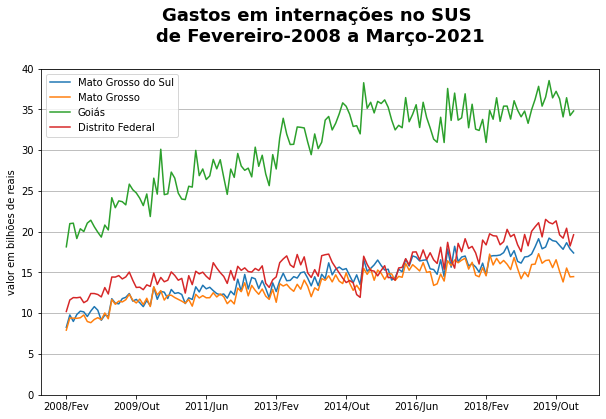

In [ ]:
gastos = df_gastos.query('Região == "Região Centro-Oeste"').T.loc[:'2020/Mar'] / 10**6
gastos.plot(figsize=(10,6))

plt.grid(axis='y')
plt.ylim(0,40)
plt.ylabel('valor em bilhões de reais')
plt.title('Gastos em internações no SUS \nde Fevereiro-2008 a Março-2021\n', size=18, weight='bold')
plt.show()

Podemos ver o aumento nos gastos em todos os estados, mas em Goiás o aumento é mais evidenciado.

## Goiás ranqueado com outras Unidades da Federação

O propósito agora é fazer uma comparação mais geral de todas os estados e verificar como Goiás se comporta nos dados do SUS a nível nacional.

### Nos últimos 13 anos (quando se começou os registros do SUS)

Observação: estamos analisando de **Março de 2008** até **Fevereiro de 2021**, onde se completam exatamente 13 anos. O mês de Março de 2021 não será analisado, por se tratar do mês mais recente e portanto, poder estar faltando dados. Vale ressaltar que o dataSUS diz nas notas das tabelas que os dados dos últimos 6 meses podem estar sujeitos a atualizações. Portanto, os últimos **5 meses** aqui analisados **(Outubro de 2020 a Fevereiro de 2020)** podem sofrer alterações nos dados, após a data em que eles foram baixados, 27/05/2021.

#### Internados

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

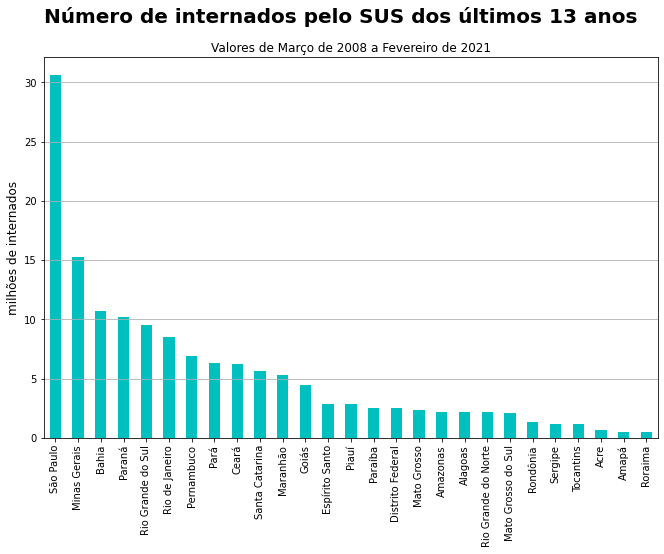

In [ ]:
internados_13anos = df_internados[df_internados.columns[1:157]].sum(axis=1).sort_values(ascending=False) / 1000000

ax = internados_13anos.plot(kind='bar', figsize=(11,7), color='c')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Número de internados pelo SUS dos últimos 13 anos', size=20, weight='bold')
plt.title('Valores de Março de 2008 a Fevereiro de 2021')
plt.ylabel('milhões de internados', size=12)
plt.xlabel('')

plt.show()

Goiás ocupa a 12ª posição dos estados que mais internaram pelo SUS

#### Óbitos

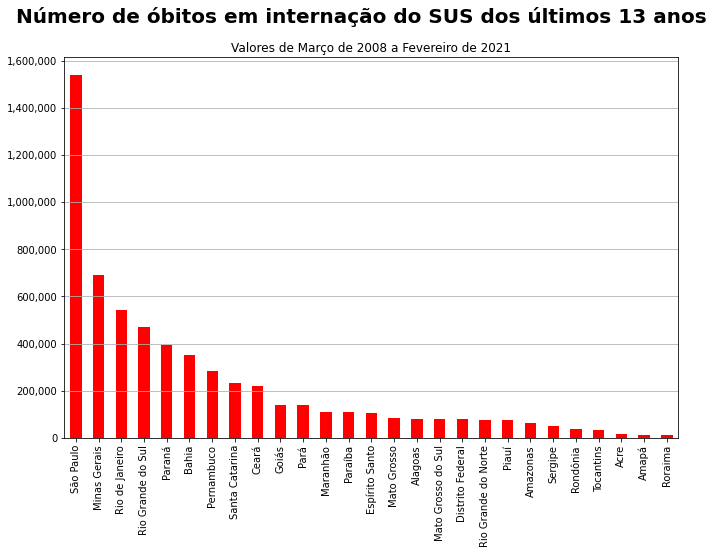

In [ ]:
obitos_13anos = df_obitos[df_obitos.columns[1:157]].sum(axis=1).sort_values(ascending=False)

ax = obitos_13anos.plot(kind='bar', figsize=(11,7), color='r')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Número de óbitos em internação do SUS dos últimos 13 anos', size=20, weight='bold')
plt.title('Valores de Março de 2008 a Fevereiro de 2021')
plt.ylabel('')
plt.xlabel('')

plt.show()

Goiás ocupa a 10ª posição dos estados onde há mais óbitos em internações do SUS

#### Taxa de mortalidade

Ao invés de somar as taxas de mortalidade, o que mais faz sentido agora é fazer a média de todo esse período analisado.

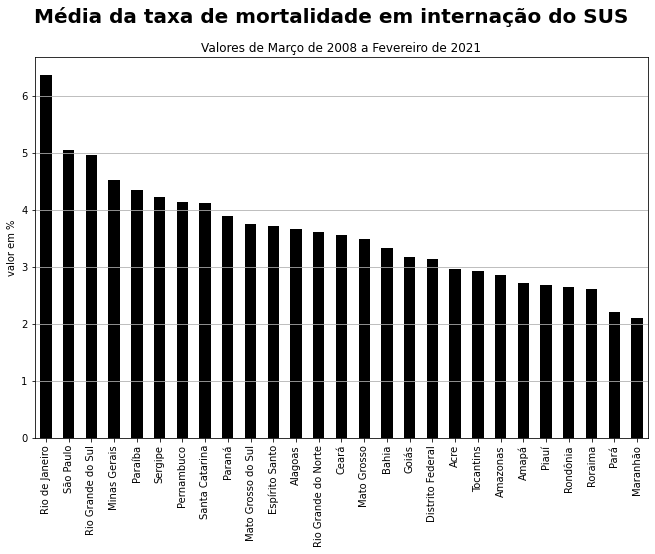

In [ ]:
mortalidade_13anos = df_mortalidade[df_mortalidade.columns[1:157]].mean(axis=1).sort_values(ascending=False)

ax = mortalidade_13anos.plot(kind='bar', figsize=(11,7), color='k')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Média da taxa de mortalidade em internação do SUS', size=20, weight='bold')
plt.title('Valores de Março de 2008 a Fevereiro de 2021')
plt.ylabel('valor em %')
plt.xlabel('')

plt.show()

Goiás ocupa a 11ª posição entre os estados com a menor taxa de mortalidade média nos últimos 13 anos. Apesar do aumento que vimos nos últimos anos, Goiás não possui um histórico de altas taxas de mortalidade comparado as outras UF.

#### Gastos com o SUS

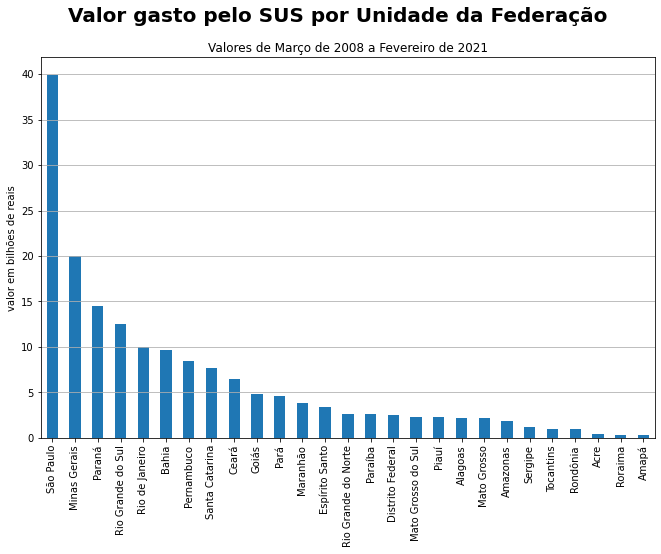

In [ ]:
gastos_13anos = df_gastos[df_gastos.columns[1:157]].sum(axis=1).sort_values(ascending=False)/10**9

ax = gastos_13anos.plot(kind='bar', figsize=(11,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Valor gasto pelo SUS por Unidade da Federação', size=20, weight='bold')
plt.title('Valores de Março de 2008 a Fevereiro de 2021')
plt.ylabel('valor em bilhões de reais')
plt.xlabel('')

plt.show()

Goiás é o 10º estado que mais gasta com internações pelo SUS

#### Média de gastos por internação

O que está será feito agora é dividir o valor total gasto pelo SUS pela quantidade de internações registradas durante esses 13 anos. Assim, teremos uma ideia bem geral de quanto se gasta por internação com o SUS. Vale ressaltar que essa média pode nos enganar muito, pois existem internações com valores distintos, umas podem sair bem mais caro para o SUS do que outras, principalmente as de maior duração.

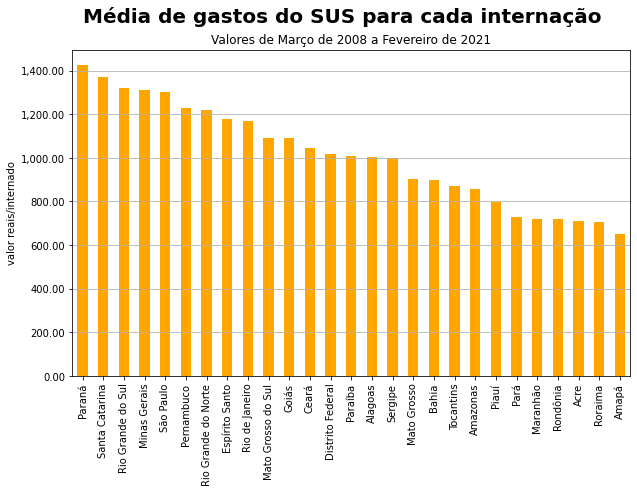

In [ ]:
gastos_por_internados_13anos = (df_gastos[df_gastos.columns[1:157]].sum(axis=1)
                                / df_internados[df_internados.columns[1:157]].sum(axis=1))
gastos_por_internados_13anos.sort_values(ascending=False, inplace=True)

ax = gastos_por_internados_13anos.plot(kind='bar', figsize=(10,6), color='orange')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.grid(axis='y')
plt.suptitle('Média de gastos do SUS para cada internação', size=20, weight='bold')
plt.title('Valores de Março de 2008 a Fevereiro de 2021')
plt.ylabel('valor reais/internado')
plt.xlabel('')

plt.show()

Vemos que Goiás é o 11º estado com maiores gastos por internações no SUS.

### Agora, vamos olhar para os últimos 6 meses

Não usaremos os valores de Março, pois provavelmente são os mais desatualizados. Por isso, estamos analisando de **Setembro de 2020 a Fevereiro de 2021**.

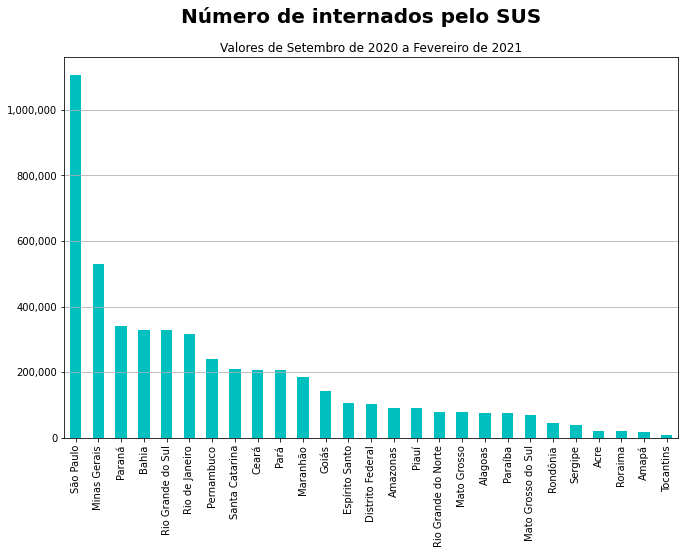

In [ ]:
internados_semestre = df_internados[df_internados.columns[151:157]].sum(axis=1).sort_values(ascending=False)

ax = internados_semestre.plot(kind='bar', figsize=(11,7), color='c')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Número de internados pelo SUS', size=20, weight='bold')
plt.title('Valores de Setembro de 2020 a Fevereiro de 2021')
plt.ylabel('', size=12)
plt.xlabel('')

plt.show()

#### Óbitos

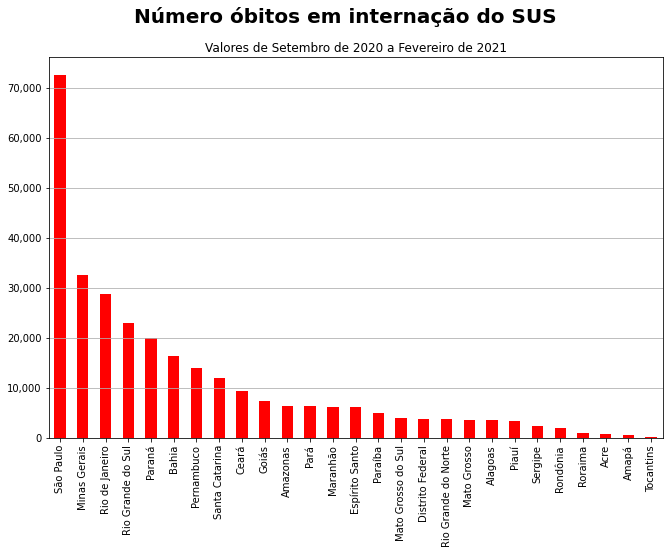

In [ ]:
obitos_semestre = df_obitos[df_obitos.columns[151:157]].sum(axis=1).sort_values(ascending=False)

ax = obitos_semestre.plot(kind='bar', figsize=(11,7), color='r')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Número óbitos em internação do SUS', size=20, weight='bold')
plt.title('Valores de Setembro de 2020 a Fevereiro de 2021')
plt.ylabel('')
plt.xlabel('')

plt.show()

#### Taxa de mortalidade

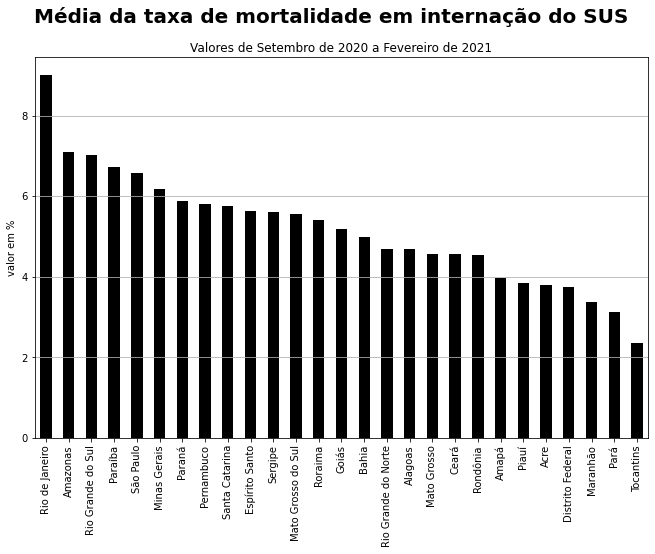

In [ ]:
mortalidade_semestre = df_mortalidade[df_mortalidade.columns[151:157]].mean(axis=1).sort_values(ascending=False)

ax = mortalidade_semestre.plot(kind='bar', figsize=(11,7), color='k')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.grid(axis='y')
plt.suptitle('Média da taxa de mortalidade em internação do SUS', size=20, weight='bold')
plt.title('Valores de Setembro de 2020 a Fevereiro de 2021')
plt.ylabel('valor em %')
plt.xlabel('')

plt.show()

Podemos observar agora que a maioria dos estados apresentaram uma alta na taxa de mortalidade nos meses mais recentes.

#### Gastos com o SUS

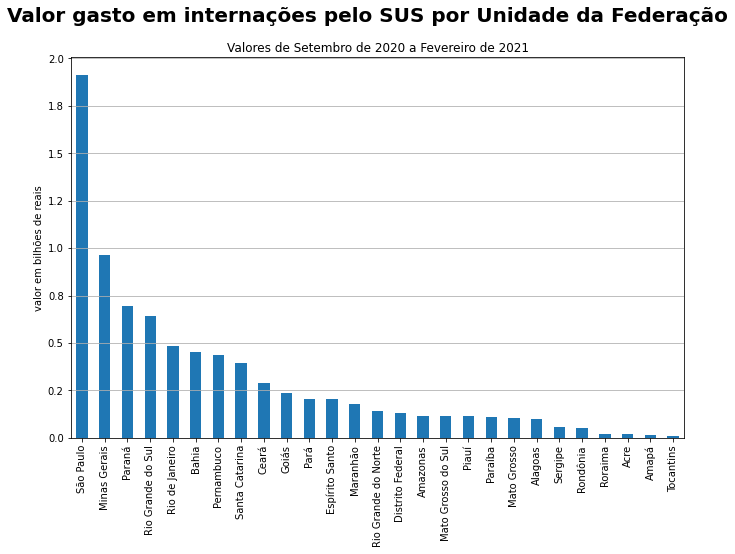

In [ ]:
gastos_semestre = df_gastos[df_gastos.columns[151:157]].sum(axis=1).sort_values(ascending=False)/1000000000

ax = gastos_semestre.plot(kind='bar', figsize=(11,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.1f}"))

plt.grid(axis='y')
plt.suptitle('Valor gasto em internações pelo SUS por Unidade da Federação', size=20, weight='bold')
plt.title('Valores de Setembro de 2020 a Fevereiro de 2021')
plt.ylabel('valor em bilhões de reais')
plt.xlabel('')

plt.show()

#### Média de gastos por internação

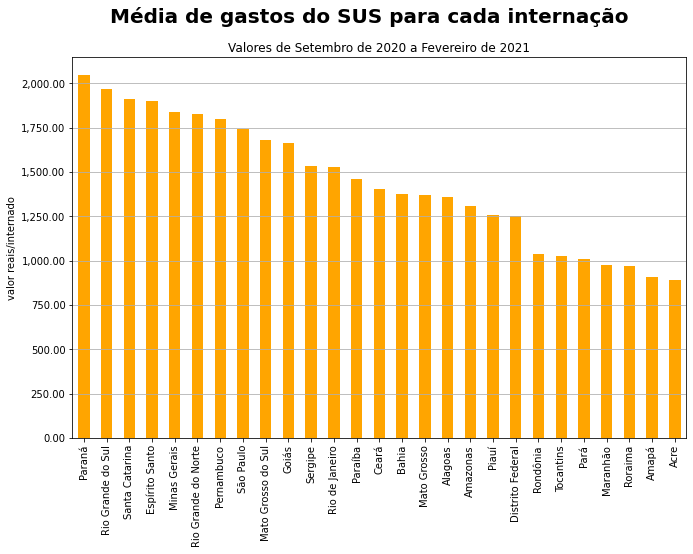

In [ ]:
gastos_por_internados_13anos = (df_gastos[df_gastos.columns[151:156]].sum(axis=1)
                                / df_internados[df_internados.columns[151:156]].sum(axis=1))
gastos_por_internados_13anos.sort_values(ascending=False, inplace=True)

ax = gastos_por_internados_13anos.plot(kind='bar', figsize=(11,7), color='orange')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.grid(axis='y')
plt.suptitle('Média de gastos do SUS para cada internação', size=20, weight='bold')
plt.title('Valores de Setembro de 2020 a Fevereiro de 2021')
plt.ylabel('valor reais/internado')
plt.xlabel('')

plt.show()

Os gastos do último semestre por internação estão muito mais elevados do que a média de 13 anos feita anteriormente. Os estados estão gastando mais porque as internações ficaram mais caras, ou porque o número de internações aumentou? Vamos fazer uma comparação entre a média de internados por semestre dos últimos 13 anos e o valor total de internados durante o último semestre para saber:

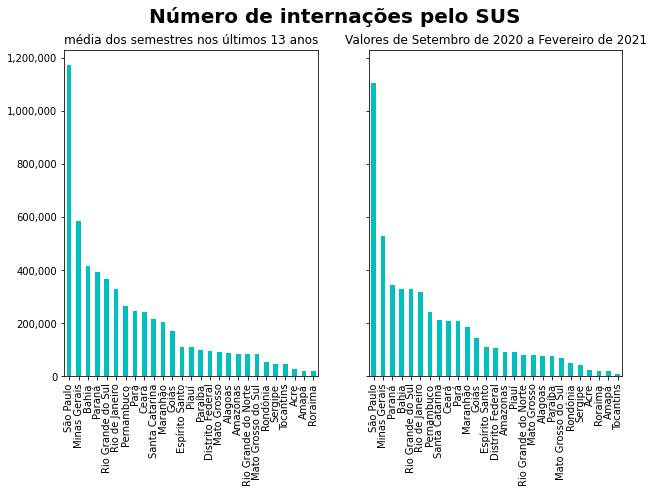

In [ ]:
internados_13anos = df_internados[df_internados.columns[1:150]].sum(axis=1).sort_values(ascending=False)/len(range(1, 150, 6))
internados_semestre = df_internados[df_internados.columns[151:157]].sum(axis=1).sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, sharex = False, sharey = True)

axes[0] = internados_13anos.plot(kind='bar', figsize=(10,6), color='c', ax=axes[0])
axes[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#axes[0].set_grid(axis='y')
#axes[0].set_suptitle('Média por semestre de internados pelo SUS', size=20, weight='bold')
axes[0].set_title('média dos semestres nos últimos 13 anos')
axes[0].set_ylabel('', size=12)
axes[0].set_xlabel('')

plt.suptitle('Número de internações pelo SUS', size=20, weight='bold')

axes[1] = internados_semestre.plot(kind='bar', figsize=(10,6), color='c', ax=axes[1])
axes[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#axes[1].set_grid(axis='y')
#axes[1].set_suptitle('Número de internados pelo SUS do último semestre', size=20, weight='bold')
axes[1].set_title('Valores de Setembro de 2020 a Fevereiro de 2021')
axes[1].set_ylabel('', size=12)
axes[1].set_xlabel('')

plt.show()

## Analisando os dados de Goiás ao longo do tempo

### Número de internações

Text(0.5, 0, '')

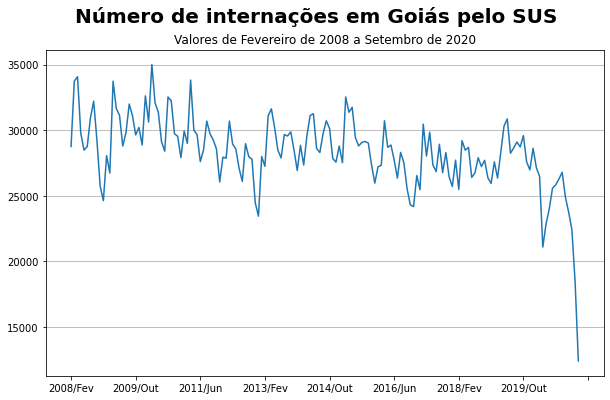

In [ ]:
df_internados.loc['Goiás']['2008/Fev':'2021/Mar'].plot(figsize=(10,6))

plt.grid(axis='y')
plt.suptitle('Número de internações em Goiás pelo SUS', size=20, weight='bold')
plt.title('Valores de Fevereiro de 2008 a Setembro de 2020')
plt.ylabel('')
plt.xlabel('')

### Número de óbitos

Vamos analisar desde o início de 2019 até o último mês, para termos um comparativo de antes da pandemia e depois da pandemia.

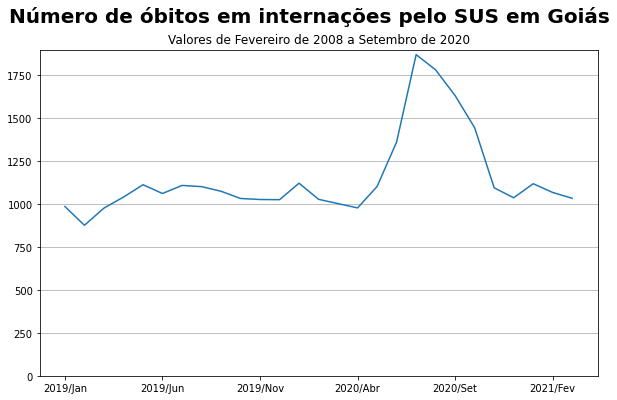

In [ ]:
df_obitos.loc['Goiás']['2019/Jan':'2021/Mar'].plot(figsize=(10,6))

plt.grid(axis='y')
plt.suptitle('Número de óbitos em internações pelo SUS em Goiás', size=20, weight='bold')
plt.title('Valores de Fevereiro de 2008 a Setembro de 2020')
plt.ylabel('')
plt.xlabel('')
plt.ylim(0,1900)
plt.show()

Agora pode-se ver um pico muito grande no meio de 2020 um valor cerca de 75% maior do que o comum observado no ano anterior, muito provável como consequência da pandemia. Esse valor também nos aponta para o aumento nas taxas de mortalidade. Vamos analisar elas agora no mesmo período.

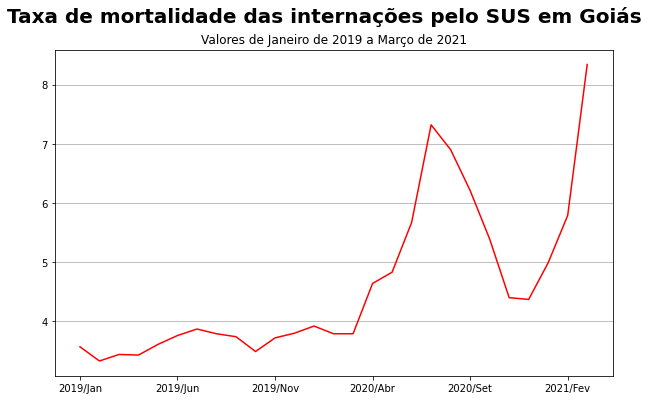

In [ ]:
df_mortalidade.loc['Goiás']['2019/Jan':'2021/Mar'].plot(figsize=(10,6), color='r')

plt.grid(axis='y')
plt.suptitle('Taxa de mortalidade das internações pelo SUS em Goiás', size=20, weight='bold')
plt.title('Valores de Janeiro de 2019 a Março de 2021')
plt.ylabel('')
plt.xlabel('')
plt.show()

Podemos ver um pico muito parecido com o do gráfico anterior no meio de 2020, mas no final ainda há uma subida muito grande no gráfico, o que se justifica ao baixo número de valores no final do gráfico de internações.

# Conclusão

Sem dúvida, é possível ver o impacto da pandemia no estado de Goiás, principalmente na taxa de mortalidade e no número de óbitos nos anos de 2020 e 2021. O que pode ser feito futuramente é comparar esses comportamentos com outros estados